In [1]:
#Importar Librerias para Advertencias
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Librerias para Machine - Learning
import numpy as np
import pandas as pd

dataforest = pd.read_csv("forestfires.csv")
dataforest.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Revisar nulos
print(dataforest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [4]:
# Revisar atipicos
print(dataforest.describe())

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

In [5]:
#Conversion de datos discretos - month
status = pd.get_dummies(dataforest['month'])

#Revisamos
status

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,1,0,0,0,0,0,0,0,0,0,0
513,0,1,0,0,0,0,0,0,0,0,0,0
514,0,1,0,0,0,0,0,0,0,0,0,0
515,0,1,0,0,0,0,0,0,0,0,0,0


In [6]:
#Agregamos las columnas a la tabla original
dataforest = pd.concat([dataforest, status], axis = 1)

#Quitamos la columna Original
dataforest.drop(['month'], axis = 1, inplace = True)

dataforest

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,7,5,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,0,1,0,0,0,0
1,7,4,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,0,1,0
2,7,4,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,0,1,0
3,8,6,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,0,1,0,0,0,0
4,8,6,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,...,0,0,0,0,0,0,0,0,0,0
513,2,4,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,...,0,0,0,0,0,0,0,0,0,0
514,7,4,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,...,0,0,0,0,0,0,0,0,0,0
515,1,4,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Conversion de datos discretos - day
statusday = pd.get_dummies(dataforest['day'])

#Revisamos
statusday

,fri,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0


In [8]:
#Agregamos las columnas a la tabla original
dataforest = pd.concat([dataforest, statusday], axis = 1)

#Quitamos la columna Original
dataforest.drop(['day'], axis = 1, inplace = True)

dataforest

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

# Configuracion inicial de entrenamiento 
np.random.seed(0)
df_train, df_test = train_test_split(dataforest, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
#Los valores son pequeños menos el area, entonces no estan en igual escala
from sklearn.preprocessing import MinMaxScaler
#Este minmax scaler es muy bueno, tambien hay unos con promedios y otros escalares
scaler = MinMaxScaler()

# Se aplica a todas las columnas menos a las dummies y a las si/no que discutimos arriba
num_vars = ['X','Y','FFMC', 'DMC', 'DC', 'ISI', 'temp','RH', 'wind', 'rain', 'area']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
124,0.250,0.285714,0.975484,0.289456,0.800781,0.700441,0.565916,0.411765,0.529412,0.0,...,0,0,1,1,0,0,0,0,0,0
209,0.875,0.142857,0.967742,0.274983,0.792377,0.788546,0.675241,0.129412,0.470588,0.0,...,0,0,1,0,0,0,0,1,0,0
329,0.375,0.142857,0.948387,0.348725,0.870857,0.370044,0.684887,0.141176,0.364706,0.0,...,0,0,1,0,0,1,0,0,0,0
397,0.500,0.571429,0.940645,0.620951,0.706913,0.334802,0.710611,0.211765,0.317647,0.0,...,0,0,0,0,0,0,1,0,0,0
488,0.375,0.285714,0.985806,0.483115,0.698390,0.779736,0.553055,0.658824,0.788235,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.375,0.571429,0.965161,0.510682,0.843750,0.356828,0.839228,0.129412,0.258824,0.0,...,0,0,1,0,0,0,1,0,0,0
280,0.375,0.571429,0.851613,0.088215,0.398674,0.180617,0.000000,0.517647,0.470588,0.0,...,0,0,0,1,0,0,0,0,0,0
53,0.375,0.142857,0.947097,0.379394,0.755563,0.422907,0.585209,0.317647,0.470588,0.0,...,0,0,0,0,0,0,0,0,0,1
350,0.500,0.285714,0.947097,0.337354,0.863518,0.422907,0.254019,0.705882,0.317647,0.0,...,0,0,1,1,0,0,0,0,0,0


In [11]:
# Dividimos x/y
y_trainXlocate = df_train.pop('X')
y_trainYlocate = df_train.pop('Y')
x_train = df_train

In [12]:
#Importamos la Libreria Para Modelo Gaussiano
import statsmodels.api as sm
import statsmodels.formula.api as smf


X_train_lm = sm.add_constant(x_train)
lr_1 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.104
Model:                          GLSAR   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.487
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0623
Time:                        16:34:58   Log-Likelihood:                 124.14
No. Observations:                 360   AIC:                            -194.3
Df Residuals:                     333   BIC:                            -89.35
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4366      0.171      2.554      0.011       0.100       0.773
FFMC          -0.2373      0.226     -1.051      0.294      -0.682       0.207
DMC            0.1903      0.088      2.160      0.032       0.017       0.364
DC            -0.3520      0.160     -2.196      0.029      -0.667      -0.037
ISI            0.0078      0.079      0.099      0.921      -0.147       0.163
temp           0.1568      0.112      1.398      0.163      -0.064       0.377
RH             0.1161      0.083      1.407      0.160      -0.046       0.279
wind          -0.0563      0.052     -1.088      0.278      -0.158       0.046
rain           0.1318      0.124      1.063      0.289      -0.112       0.376
area           0.1198      0.142      0.844      0.400      -0.160       0.399
apr           -0.0250      0.091     -0.275      0.784      -0.204       0.154
aug            0.0732      0.075      0.978      0.329      -0.074       0.220
dec            0.2539      0.080      3.181      0.002       0.097       0.411
feb            0.0131      0.065      0.201      0.841      -0.115       0.142
jan           -0.1390      0.230     -0.605      0.546      -0.591       0.313
jul            0.1012      0.065      1.560      0.120      -0.026       0.229
jun            0.0406      0.062      0.651      0.515      -0.082       0.163
mar            0.0290      0.060      0.481      0.631      -0.090       0.148
may           -0.0812      0.131     -0.619      0.536      -0.339       0.177
nov           -0.1556      0.172     -0.907      0.365      -0.493       0.182
oct            0.1910      0.103      1.851      0.065      -0.012       0.394
sep            0.1355      0.089      1.529      0.127      -0.039       0.310
fri            0.0199      0.033      0.596      0.551      -0.046       0.086
mon            0.0635      0.034      1.885      0.060      -0.003       0.130
sat            0.0644      0.033      1.942      0.053      -0.001       0.130
sun            0.0646      0.034      1.922      0.055      -0.002       0.131
thu            0.0826      0.037      2.235      0.026       0.010       0.155
tue            0.0379      0.034      1.130      0.259      -0.028       0.104
wed            0.1038      0.037      2.840      0.005       0.032       0.176
==============================================================================
Omnibus:                       16.968   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.461
Skew:                           0.292   Prob(JB):                     4.01e-07
Kurtosis:                       4.274   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [13]:
# Modulo de statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Crear una dataframe con los valores VIF de cada entrada
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,jul,inf
15,jun,inf
26,tue,inf
25,thu,inf
24,sun,inf
23,sat,inf
22,mon,inf
21,fri,inf
20,sep,inf
19,oct,inf


In [14]:
# Eliminamos jul
X = x_train.drop('jul', 1,)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()

# Miremos como quedo
print(lr_2.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.104
Model:                          GLSAR   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.487
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0623
Time:                        16:34:58   Log-Likelihood:                 124.14
No. Observations:                 360   AIC:                            -194.3
Df Residuals:                     333   BIC:                            -89.35
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5252      0.211      2.484      0.0

In [15]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,sun,127.31
20,fri,115.13
21,mon,99.75
22,sat,93.57
25,tue,89.66
26,wed,72.94
24,thu,71.04
2,DC,25.85
19,sep,11.58
15,mar,7.64


In [16]:
# Eliminamos sun
X = X.drop('sun', 1)
X_train_lm = sm.add_constant(X)

lr_3 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_3.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.104
Model:                          GLSAR   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.487
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0623
Time:                        16:34:59   Log-Likelihood:                 124.14
No. Observations:                 360   AIC:                            -194.3
Df Residuals:                     333   BIC:                            -89.35
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6024      0.244      2.469      0.0

In [17]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,FFMC,139.36
2,DC,121.71
4,temp,36.53
19,sep,17.32
1,DMC,14.19
3,ISI,10.97
10,aug,9.76
5,RH,8.27
15,mar,6.85
6,wind,5.25


In [18]:
# Eliminamos sat
X = X.drop('sat', 1)
X_train_lm = sm.add_constant(X)

lr_4 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_4.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.104
Model:                          GLSAR   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.551
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0471
Time:                        16:34:59   Log-Likelihood:                 124.14
No. Observations:                 360   AIC:                            -196.3
Df Residuals:                     334   BIC:                            -95.23
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6022      0.241      2.497      0.0

In [19]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,FFMC,137.58
2,DC,121.55
4,temp,36.51
19,sep,17.31
1,DMC,14.13
3,ISI,10.97
10,aug,9.74
5,RH,8.24
15,mar,6.79
6,wind,5.23


In [20]:
# Eliminamos mon
X = X.drop('mon', 1)
X_train_lm = sm.add_constant(X)

lr_5 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_5.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.104
Model:                          GLSAR   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.620
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0348
Time:                        16:34:59   Log-Likelihood:                 124.14
No. Observations:                 360   AIC:                            -198.3
Df Residuals:                     335   BIC:                            -101.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6018      0.240      2.504      0.0

In [21]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,FFMC,134.75
2,DC,121.34
4,temp,36.37
19,sep,17.31
1,DMC,14.09
3,ISI,10.90
10,aug,9.73
5,RH,8.22
15,mar,6.78
6,wind,5.21


In [22]:
# Eliminamos FFMC
X = X.drop('FFMC', 1)
X_train_lm = sm.add_constant(X)

lr_6 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_6.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.101
Model:                          GLSAR   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.642
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0334
Time:                        16:34:59   Log-Likelihood:                 123.54
No. Observations:                 360   AIC:                            -199.1
Df Residuals:                     336   BIC:                            -105.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3849      0.125      3.075      0.0

In [23]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,DC,96.59
3,temp,22.32
18,sep,17.14
0,DMC,13.95
9,aug,9.63
2,ISI,8.59
4,RH,6.12
5,wind,5.17
17,oct,2.67
14,mar,2.58


In [24]:
# Eliminamos DC
X = X.drop('DC', 1)
X_train_lm = sm.add_constant(X)

lr_7 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_7.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.089
Model:                          GLSAR   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.494
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0728
Time:                        16:34:59   Log-Likelihood:                 121.12
No. Observations:                 360   AIC:                            -196.2
Df Residuals:                     337   BIC:                            -106.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2403      0.106      2.272      0.0

In [25]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,13.92
0,DMC,9.31
1,ISI,8.59
8,aug,5.72
4,wind,5.16
3,RH,4.69
17,sep,4.63
13,mar,1.92
18,fri,1.50
10,feb,1.48


In [26]:
# Eliminamos apr
X = X.drop('apr', 1)
X_train_lm = sm.add_constant(X)

lr_8 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_8.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.089
Model:                          GLSAR   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.569
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0544
Time:                        16:34:59   Log-Likelihood:                 121.11
No. Observations:                 360   AIC:                            -198.2
Df Residuals:                     338   BIC:                            -112.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2460      0.092      2.681      0.0

In [27]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,13.68
0,DMC,9.11
1,ISI,8.59
7,aug,5.52
4,wind,4.88
3,RH,4.62
16,sep,4.44
12,mar,1.80
17,fri,1.50
9,feb,1.43


In [28]:
# Eliminamos temp
X = X.drop('temp', 1)
X_train_lm = sm.add_constant(X)

lr_9 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_9.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.082
Model:                          GLSAR   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.519
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0720
Time:                        16:34:59   Log-Likelihood:                 119.82
No. Observations:                 360   AIC:                            -197.6
Df Residuals:                     339   BIC:                            -116.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3610      0.055      6.600      0.0

In [29]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,DMC,7.27
1,ISI,6.81
6,aug,5.08
3,wind,4.83
2,RH,4.29
15,sep,3.64
11,mar,1.66
16,fri,1.50
18,tue,1.34
7,dec,1.34


In [30]:
# Eliminamos DMC
X = X.drop('DMC', 1)
X_train_lm = sm.add_constant(X)

lr_10 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_10.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.078
Model:                          GLSAR   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.509
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0796
Time:                        16:34:59   Log-Likelihood:                 118.94
No. Observations:                 360   AIC:                            -197.9
Df Residuals:                     340   BIC:                            -120.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3880      0.051      7.671      0.0

In [31]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,ISI,6.42
2,wind,4.83
1,RH,3.99
5,aug,3.79
14,sep,2.98
10,mar,1.65
15,fri,1.49
17,tue,1.34
6,dec,1.34
7,feb,1.30


In [32]:
# Eliminamos ISI
X = X.drop('ISI', 1)
X_train_lm = sm.add_constant(X)

lr_11 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_11.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.078
Model:                          GLSAR   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.597
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0586
Time:                        16:34:59   Log-Likelihood:                 118.93
No. Observations:                 360   AIC:                            -199.9
Df Residuals:                     341   BIC:                            -126.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3854      0.044      8.827      0.0

In [33]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,wind,4.21
0,RH,3.96
4,aug,2.68
13,sep,2.43
9,mar,1.61
14,fri,1.46
5,dec,1.32
16,tue,1.31
6,feb,1.30
17,wed,1.22


In [34]:
# Eliminamos jun
X = X.drop('jan', 1)
X_train_lm = sm.add_constant(X)

lr_12 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_12.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.078
Model:                          GLSAR   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.694
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0420
Time:                        16:34:59   Log-Likelihood:                 118.92
No. Observations:                 360   AIC:                            -201.8
Df Residuals:                     342   BIC:                            -131.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3848      0.043      8.876      0.0

In [35]:
# Eliminamos jun
X = X.drop('jun', 1)
X_train_lm = sm.add_constant(X)

lr_13 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_13.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.078
Model:                          GLSAR   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.805
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0291
Time:                        16:34:59   Log-Likelihood:                 118.92
No. Observations:                 360   AIC:                            -203.8
Df Residuals:                     343   BIC:                            -137.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3852      0.039      9.841      0.0

In [36]:
# Eliminamos ISI
X = X.drop('mar', 1)
X_train_lm = sm.add_constant(X)

lr_14 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_14.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.078
Model:                          GLSAR   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.931
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0196
Time:                        16:34:59   Log-Likelihood:                 118.92
No. Observations:                 360   AIC:                            -205.8
Df Residuals:                     344   BIC:                            -143.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3840      0.034     11.287      0.0

In [37]:
# Eliminamos feb
X = X.drop('feb', 1)
X_train_lm = sm.add_constant(X)

lr_15 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_15.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.077
Model:                          GLSAR   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.066
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0132
Time:                        16:34:59   Log-Likelihood:                 118.86
No. Observations:                 360   AIC:                            -207.7
Df Residuals:                     345   BIC:                            -149.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3817      0.033     11.448      0.0

In [38]:
# Eliminamos thu
X = X.drop('thu', 1)
X_train_lm = sm.add_constant(X)

lr_16 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_16.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.077
Model:                          GLSAR   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.225
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00845
Time:                        16:34:59   Log-Likelihood:                 118.82
No. Observations:                 360   AIC:                            -209.6
Df Residuals:                     346   BIC:                            -155.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3838      0.032     11.837      0.0

In [39]:
# Eliminamos may
X = X.drop('may', 1)
X_train_lm = sm.add_constant(X)

lr_17 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_17.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.076
Model:                          GLSAR   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.370
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00607
Time:                        16:35:00   Log-Likelihood:                 118.55
No. Observations:                 360   AIC:                            -211.1
Df Residuals:                     347   BIC:                            -160.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3834      0.032     11.833      0.0

In [40]:
# Eliminamos tue
X = X.drop('tue', 1)
X_train_lm = sm.add_constant(X)

lr_18 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_18.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.073
Model:                          GLSAR   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.488
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00513
Time:                        16:35:00   Log-Likelihood:                 117.99
No. Observations:                 360   AIC:                            -212.0
Df Residuals:                     348   BIC:                            -165.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3794      0.032     11.793      0.0

In [41]:
# Eliminamos may
X = X.drop('rain', 1)
X_train_lm = sm.add_constant(X)

lr_18 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_18.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.070
Model:                          GLSAR   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.613
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00450
Time:                        16:35:00   Log-Likelihood:                 117.37
No. Observations:                 360   AIC:                            -212.7
Df Residuals:                     349   BIC:                            -170.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3745      0.032     11.749      0.0

In [42]:
# Eliminamos wind
X = X.drop('wind', 1)
X_train_lm = sm.add_constant(X)

lr_19 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_19.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.066
Model:                          GLSAR   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.762
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00392
Time:                        16:35:00   Log-Likelihood:                 116.72
No. Observations:                 360   AIC:                            -213.4
Df Residuals:                     350   BIC:                            -174.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3539      0.026     13.576      0.0

In [43]:
# Eliminamos dec
X = X.drop('dec', 1)
X_train_lm = sm.add_constant(X)

lr_20 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_20.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.064
Model:                          GLSAR   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     3.011
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00278
Time:                        16:35:00   Log-Likelihood:                 116.32
No. Observations:                 360   AIC:                            -214.6
Df Residuals:                     351   BIC:                            -179.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3596      0.025     14.230      0.0

In [44]:
# Eliminamos oct
X = X.drop('oct', 1)
X_train_lm = sm.add_constant(X)

lr_21 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_21.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.061
Model:                          GLSAR   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.249
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00235
Time:                        16:35:00   Log-Likelihood:                 115.64
No. Observations:                 360   AIC:                            -215.3
Df Residuals:                     352   BIC:                            -184.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3520      0.024     14.421      0.0

In [45]:
# Eliminamos nov
X = X.drop('nov', 1)
X_train_lm = sm.add_constant(X)

lr_22 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_22.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.057
Model:                          GLSAR   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.526
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00211
Time:                        16:35:00   Log-Likelihood:                 114.85
No. Observations:                 360   AIC:                            -215.7
Df Residuals:                     353   BIC:                            -188.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3490      0.024     14.357      0.0

In [46]:
# Eliminamos area
X = X.drop('area', 1)
X_train_lm = sm.add_constant(X)

lr_23 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_23.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.052
Model:                          GLSAR   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     3.891
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00191
Time:                        16:35:00   Log-Likelihood:                 114.00
No. Observations:                 360   AIC:                            -216.0
Df Residuals:                     354   BIC:                            -192.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3529      0.024     14.613      0.0

In [47]:
# Eliminamos wed
X = X.drop('wed', 1)
X_train_lm = sm.add_constant(X)

lr_24 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_24.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.048
Model:                          GLSAR   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.462
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00157
Time:                        16:35:00   Log-Likelihood:                 113.20
No. Observations:                 360   AIC:                            -216.4
Df Residuals:                     355   BIC:                            -197.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3580      0.024     15.030      0.0

In [48]:
# Eliminamos dec
X = X.drop('RH', 1)
X_train_lm = sm.add_constant(X)

lr_25 = sm.GLSAR(y_trainYlocate, X_train_lm).fit()
print(lr_25.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.043
Model:                          GLSAR   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     5.376
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00125
Time:                        16:35:00   Log-Likelihood:                 112.34
No. Observations:                 360   AIC:                            -216.7
Df Residuals:                     356   BIC:                            -201.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3801      0.017     22.788      0.0

In [49]:
#Creamos nuevamente los VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,fri,1.19
1,sep,1.17
0,aug,1.02


Text(0.5, 0, 'Errors')

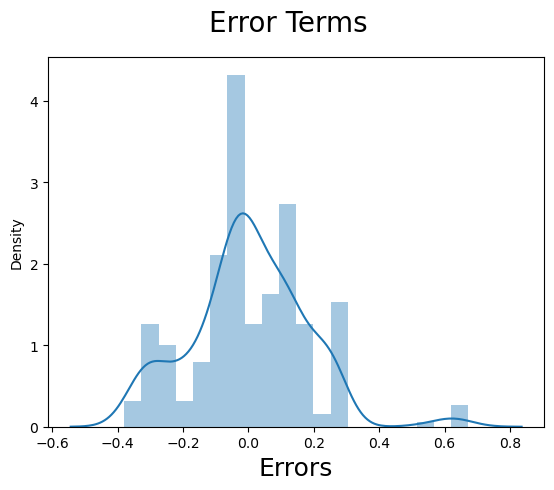

In [50]:
#Ya todos los P[t] < 0.05, y los VIF < 5
#Verificar con los errores como vimos la clase pasada
import seaborn as sns
import matplotlib.pyplot as plt 
y_train_X = lr_25.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_trainYlocate - y_train_X), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [51]:
#A comparacion del OLS, el GLSAR, nos presenta una mejor densidad y dispersion mas centralizada
num_vars = ['X','Y','FFMC', 'DMC', 'DC', 'ISI', 'temp','RH', 'wind', 'rain', 'area']
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
217,0.000,0.142857,0.901935,0.312543,0.821615,0.312775,0.327974,0.682353,0.635294,0.0,...,0,0,1,0,1,0,0,0,0,0
260,0.125,0.285714,0.966452,0.333563,0.622869,0.634361,0.839228,0.200000,0.364706,0.0,...,0,0,0,0,1,0,0,0,0,0
142,0.875,0.571429,0.921290,0.368367,0.608428,0.550661,0.610932,0.423529,0.941176,0.0,...,0,0,0,1,0,0,0,0,0,0
152,0.250,0.285714,0.921290,0.172640,0.483310,0.273128,0.720257,0.329412,0.105882,0.0,...,0,0,0,0,0,1,0,0,0,0
255,0.125,0.428571,0.887742,0.261544,0.803741,0.220264,0.646302,0.364706,0.364706,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.750,0.285714,0.940645,0.355272,0.543442,0.396476,0.639871,0.400000,0.211765,0.0,...,0,0,0,0,0,1,0,0,0,0
21,0.500,0.285714,0.943226,0.266713,0.838660,0.405286,0.543408,0.270588,0.211765,0.0,...,0,0,1,0,1,0,0,0,0,0
271,0.875,0.571429,0.947097,0.522054,0.760417,0.629956,0.575563,0.505882,0.423529,0.0,...,0,0,0,0,0,0,0,0,1,0
407,0.375,0.428571,0.851613,0.024466,0.046402,0.127753,0.385852,0.364706,0.364706,0.0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
#Separar x de y
y_test = df_test.pop('X')
y_testlocateY = df_test.pop('Y')
X_test = df_test

# Añadir variables
X_test_m25 = sm.add_constant(X_test)

# Quitar las mismas variables que quitamos en el training
X_test_m25 = X_test_m25.drop(["FFMC","temp","RH","wind", "DMC", "DC", "ISI", "area", "apr", "dec", "feb", "jan", "jun","jul", "mar", "may", "nov", "oct", "fri","mon","sat","sun","thu","tue","wed"], axis = 1)

# Hacer predicciones
y_pred_m24 = lr_25.predict(X_test_m25)


In [53]:
from sklearn.metrics import r2_score
#Observar los valores de r2
r2_score(y_true = y_test, y_pred = y_pred_m24)

-0.22104292443514284

In [54]:
#El modelo entrenado mediante Weighted Least Squares, no sirve, ya que da un error negativo, ademas de tener un desfase demasiado alto
#Con respecto al estadistico que es de 0.05376, por lo que entrenar este modelo con Weighted Least Squares no es eficaz.